# TP 1.3 - Minor Assignments 8 & 9

In [1]:
%matplotlib notebook

<div class="alert alert-danger">
  <b>Minor Assignment 8/13:</b> <br/>  
Based on the VC generalization bound, compare the number of training examples required to ensure a specific generalization error for different VC dimensions, epsilon and delta values (cf. course material). Discuss the results.
</div>

<IPython.core.display.Javascript object>


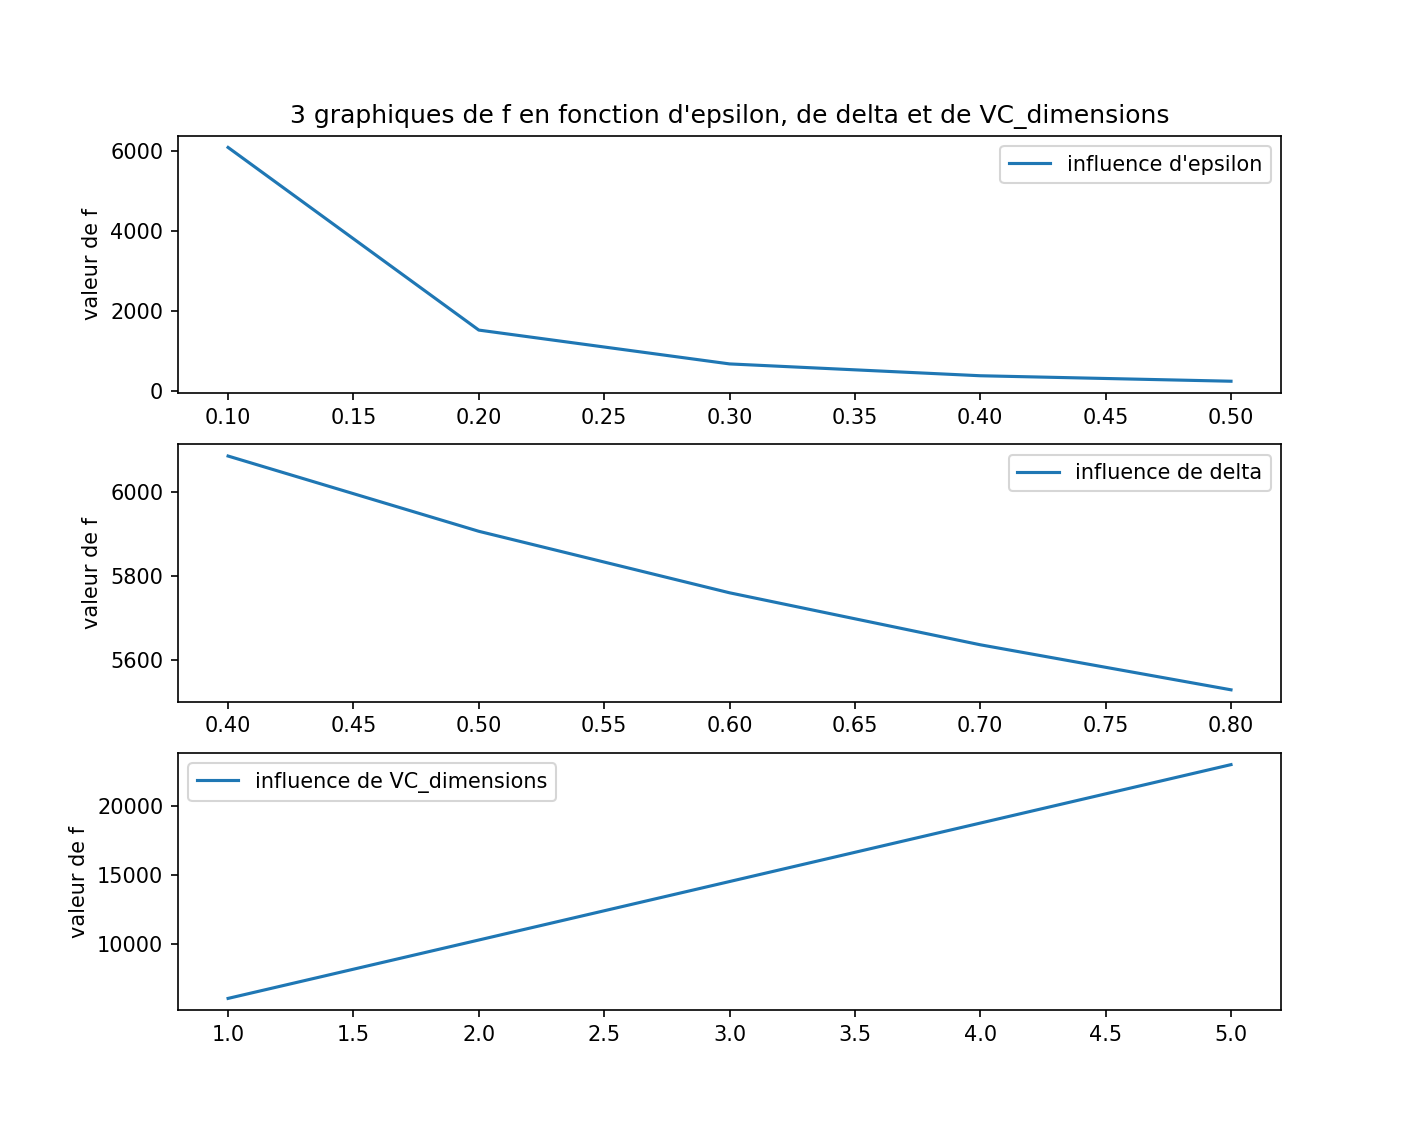

In [2]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 8

import numpy as np
import matplotlib.pyplot as plt

m = 100
epsilon = [0.1, 0.2, 0.3, 0.4, 0.5]  # liste des epsilon
delta = [0.4, 0.5, 0.6, 0.7, 0.8]  # liste des delta
VC_dimensions = [1, 2, 3, 4, 5]  # liste des dimensions de VC


# définition de la fonction f
def f(e, d, dim):
    return 8 / e ** 2 * np.log(4 * ((2 * m) ** dim + 1) / d)


fdelta = []  # liste des valeurs de f selon les différents delta
fepsilon = []  # liste des valeurs de f selon les différents epsilon
fVC_dimensions = []  # liste des valeurs de f selon les différentes dimensions de VC

for i in epsilon:
    fepsilon.append(f(i, delta[0], VC_dimensions[0]))  # calcul de f pour delta et VC_dimensions fixés

for i in delta:
    fdelta.append(f(epsilon[0], i, VC_dimensions[0]))  # calcul de f pour epsilon et VC_dimensions fixés

for i in VC_dimensions:
    fVC_dimensions.append(f(epsilon[0], delta[0], i))  # calcul de f pour delta et epsilon fixés

# affichage
plt.subplot(3, 1, 1)
plt.plot(epsilon, fepsilon, label="influence d'epsilon")
plt.title("3 graphiques de f en fonction d'epsilon, de delta et de VC_dimensions")
plt.ylabel('valeur de f')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(delta, fdelta, label='influence de delta')
plt.ylabel('valeur de f')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(VC_dimensions, fVC_dimensions, label='influence de VC_dimensions')
plt.ylabel('valeur de f')
plt.legend()
plt.show()


Comparaison :
On remarque qu'epsilon est au dénominateur de la formule de f, ce qui explique son effet décroissant sur f lorsque sa valeur augmente (perte de 5000 pour f entre les valeurs 0.1 et 0.2 d'epsilon).
De même pour delta, mais son effet est moins prononcé (perte de 400 pour f pour une augmentation de 0.3 de delta).
VC_dimensions étant au numérateur de la fonction f, son effet est croissant sur f. Le graphique obtenu est une droite de coefficient directeur VC_dimensions (si on considère que 2m>>1, on peut réécrire f de la façon arrondie suivante: 8/e**2*(np.log(4)+(dim+1)*np.log(2*m)-np.log(d))

<div class="alert alert-danger">
  <b>Minor Assignment 9/13:</b> <br/>  
Analyze the training and test scores for linear and ridge regressions as well as Lasso (https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.Lasso.html). Perform the comparison for several training sizes and graphically represent the results. Perform a comparison of the weights obtained by the three approaches. What do you observe?
</div>

<IPython.core.display.Javascript object>


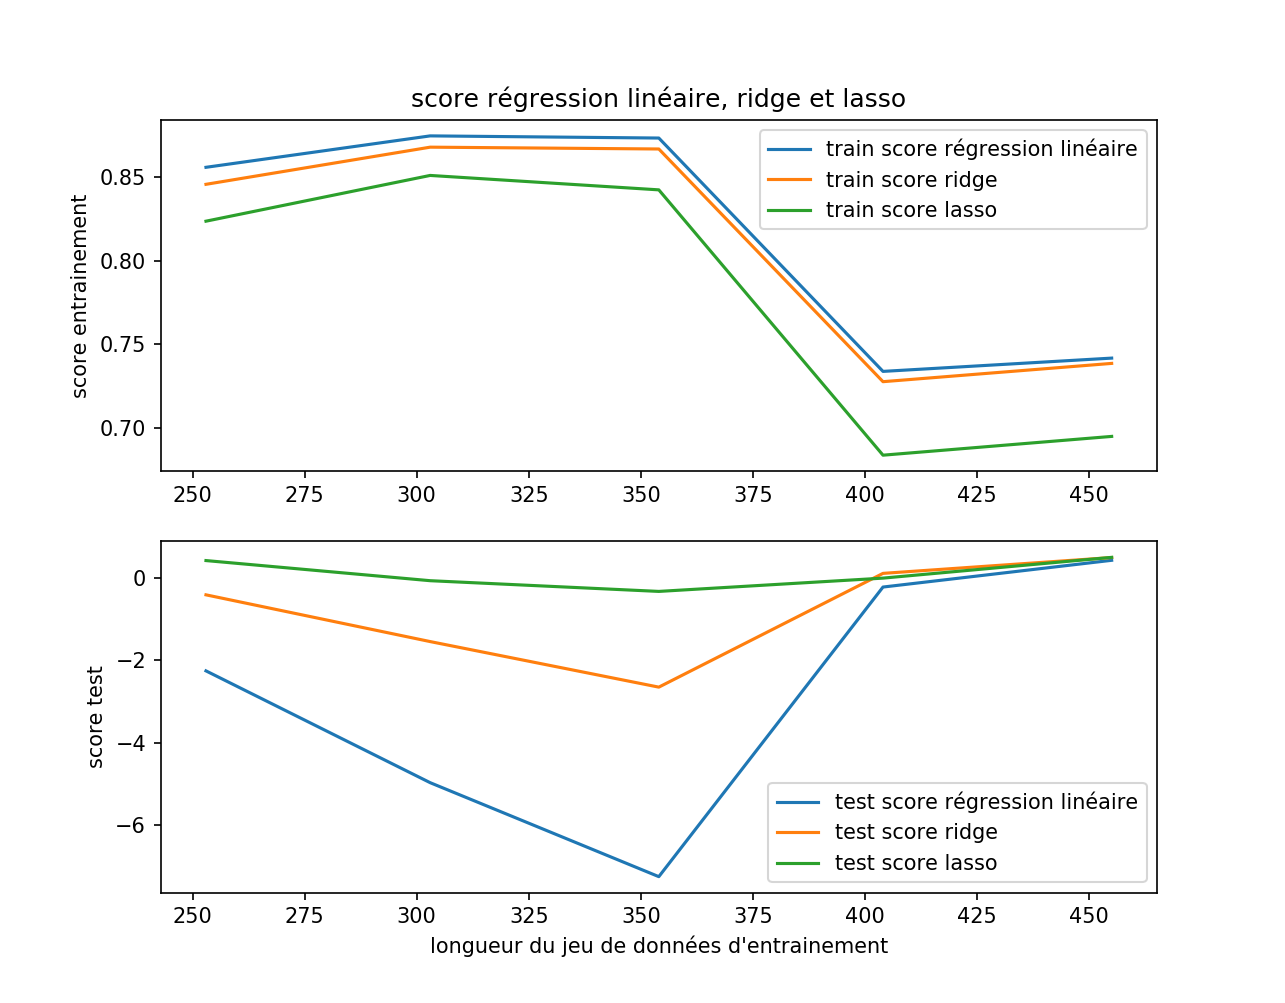

poids pour la régression linéaire = [ -9.48190596   4.91031831   0.80907068   2.50883963  -8.54526757
  19.95127175   1.02092739 -15.7734769    8.33412359  -7.41627752
  -8.56680593   3.85214411 -20.11468639]
poids pour Ridge = [ -6.64108829   4.0976974   -0.16866238   2.77349742  -6.81115321
  18.78171404   0.86787761 -13.14011039   6.33474268  -5.95390179
  -8.3304061    3.79183831 -19.28116398]
poids pour Lasso = [ -0.           0.          -0.           2.04502047  -0.05780323
  19.74364315   0.          -2.48523127   0.          -1.31913721
  -6.78091542   2.2330118  -19.89993009]


<IPython.core.display.Javascript object>


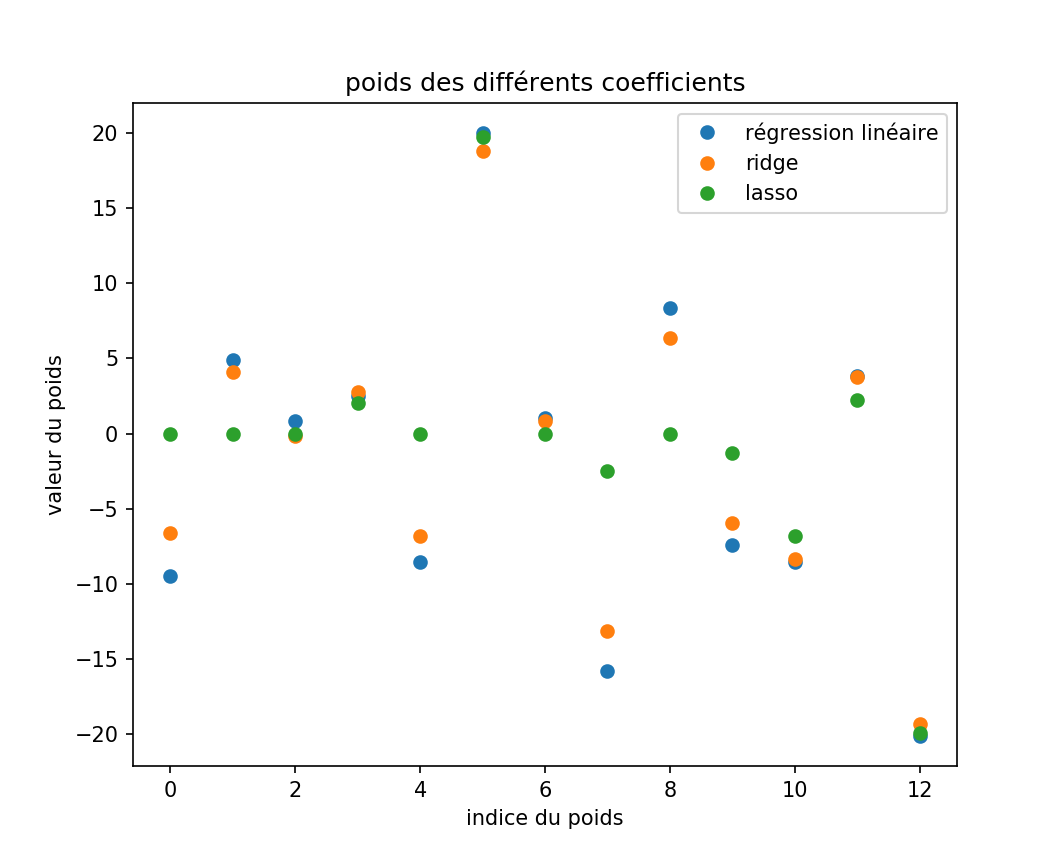

In [3]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 9

# import des bibliothèques
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# import des données
bhpd = load_boston()

# on sépare les valeurs des features et celles des labels
data = bhpd.data
target = bhpd.target

longueurTrain = [int(0.5 * len(data)), int(0.6 * len(data)), int(0.7 * len(data)), int(0.8 * len(data)),
                 int(0.9 * len(data))]  # différentes tailles de données d'entrainement

liste_train_score_lr = []
liste_test_score_lr = []
liste_train_score_ridge = []
liste_test_score_ridge = []
liste_train_score_lasso = []
liste_test_score_lasso = []

for i in longueurTrain:
    # on partage en deux parties les valeurs des labels et des features, une partie entrainement et une de test
    X_train = data[:i]
    X_test = data[i:]
    y_train = target[:i]
    y_test = target[i:]
    
    mms = MinMaxScaler()
    X_train = mms.fit_transform(X_train)  # entraine et transforme
    X_test = mms.transform(X_test)  # transforme seulement en se basant sur l'entrainement
    
    # partie régression linéaire
    lr = LinearRegression().fit(X_train, y_train)  # on entraine notre modèle
    train_score_lr = lr.score(X_train, y_train)
    test_score_lr = lr.score(X_test, y_test)
    liste_train_score_lr.append(train_score_lr)
    liste_test_score_lr.append(test_score_lr)
    
    # partie ridge
    ridge = Ridge(alpha=1.0).fit(X_train, y_train)  # on entraine notre modèle
    train_score_ridge = ridge.score(X_train, y_train)
    test_score_ridge = ridge.score(X_test, y_test)
    liste_train_score_ridge.append(train_score_ridge)
    liste_test_score_ridge.append(test_score_ridge)
    
    # partie lasso
    clf = linear_model.Lasso(alpha=0.1)
    lasso = clf.fit(X_train, y_train)  # on entraine notre modèle
    train_score_lasso = lasso.score(X_train, y_train)
    test_score_lasso = lasso.score(X_test, y_test)
    liste_train_score_lasso.append(train_score_lasso)
    liste_test_score_lasso.append(test_score_lasso)

# affichage des scores d'entrainement
plt.figure(1)
plt.subplot(2, 1, 1)
plt.plot(longueurTrain, liste_train_score_lr, label='train score régression linéaire')
plt.plot(longueurTrain, liste_train_score_ridge, label='train score ridge')
plt.plot(longueurTrain, liste_train_score_lasso, label='train score lasso')
plt.title("score régression linéaire, ridge et lasso")
plt.ylabel('score entrainement')
plt.legend()

# affichage des scores de test
plt.subplot(2, 1, 2)
plt.plot(longueurTrain, liste_test_score_lr, label='test score régression linéaire')
plt.plot(longueurTrain, liste_test_score_ridge, label='test score ridge')
plt.plot(longueurTrain, liste_test_score_lasso, label='test score lasso')
plt.xlabel("longueur du jeu de données d'entrainement")
plt.ylabel('score test')
plt.legend()

plt.show()

# weights
weight_lr = lr.coef_
weight_ridge = ridge.coef_
weight_lasso = lasso.coef_

print('poids pour la régression linéaire = {}'.format(weight_lr))
print('poids pour Ridge = {}'.format(weight_ridge))
print('poids pour Lasso = {}'.format(weight_lasso))

# on affiche les valeurs des poids selon leurs indices
x = np.arange(len(weight_lr))
plt.figure(2)
plt.plot(x, weight_lr, 'o', label='régression linéaire')
plt.plot(x, weight_ridge, 'o', label='ridge')
plt.plot(x, weight_lasso, 'o', label='lasso')
plt.title('poids des différents coefficients')
plt.xlabel('indice du poids')
plt.ylabel('valeur du poids')
plt.legend()
plt.show()


Les poids de Lasso ont des valeurs plus proches de 0 que pour la régression linéaire et Ridge. Les poids de la régression linéaire et Ridge ont en général des valeurs très proches, pour chaque indice, alors qu'on peut mieux distinguer les poids de Lasso.